# Load Data

In [ ]:
import pandas as pd

# Load the full training events CSV
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Code-and-Files/train_events.csv')

# Preview
print(train_df.head())

   record timestamp  client timestamp    button state    x    y    user  \
0             0.000             0.000  NoButton  Move  681  694  user35   
1             0.118             0.109  NoButton  Move  570  526  user35   
2             0.216             0.218  NoButton  Move  427  317  user35   
3             0.351             0.343  NoButton  Move  367  241  user35   
4             0.545             0.437  NoButton  Move  349  214  user35   

              session  
0  session_5394017914  
1  session_5394017914  
2  session_5394017914  
3  session_5394017914  
4  session_5394017914  


In [ ]:
import pandas as pd

# Load the full training events CSV
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Code-and-Files/test_events.csv')

# Preview
print(test_df.head())

   record timestamp  client timestamp    button state    x    y    user  \
0             0.000             0.000  NoButton  Move  592  268  user23   
1             0.112             0.110  NoButton  Move  599  219  user23   
2             0.216             0.219  NoButton  Move  640  196  user23   
3             0.216             0.219  NoButton  Move  650  192  user23   
4             0.440             0.312  NoButton  Move  778  159  user23   

              session  is_illegal  
0  session_4199921692         0.0  
1  session_4199921692         0.0  
2  session_4199921692         0.0  
3  session_4199921692         0.0  
4  session_4199921692         0.0  


# Label Scroll Event for Train and Test

In [ ]:
train_df['is_scroll'] = train_df['button'] == 'Scroll'
test_df['is_scroll'] = test_df['button'] == 'Scroll'
train_df[train_df["is_scroll"]==True]

,record timestamp,client timestamp,button,state,x,y,user,session,is_scroll
702,133.634,133.630,Scroll,Down,0,0,user35,session_5394017914,True
704,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914,True
706,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914,True
709,134.079,134.083,Scroll,Down,0,0,user35,session_5394017914,True
711,134.293,134.161,Scroll,Down,0,0,user35,session_5394017914,True
...,...,...,...,...,...,...,...,...,...
2235970,1575.624,1575.610,Scroll,Down,0,0,user20,session_3767642011,True
2235971,1575.624,1575.610,Scroll,Up,0,0,user20,session_3767642011,True
2235972,1575.624,1575.641,Scroll,Up,0,0,user20,session_3767642011,True
2235973,1575.773,1575.657,Scroll,Up,0,0,user20,session_3767642011,True


In [ ]:
from tqdm import tqdm

def expand_scroll_blocks(df, time_col='client timestamp', scroll_col='is_scroll', threshold=10.0):
    df = df.copy()
    scroll_indices = df[df[scroll_col]].index.to_list()

    for i in tqdm(range(1, len(scroll_indices)), desc="Expanding scroll blocks"):
        current_idx = scroll_indices[i]
        prev_idx = scroll_indices[i - 1]
        current_time = df.at[current_idx, time_col]
        prev_time = df.at[prev_idx, time_col]

        if current_time - prev_time <= threshold:
            # Mark rows strictly in between two scroll events
            in_between = df.index.to_series().between(prev_idx + 1, current_idx - 1)
            df.loc[in_between, scroll_col] = True

    return df

In [ ]:
train_df = expand_scroll_blocks(train_df)

Expanding scroll blocks: 100%|██████████| 95495/95495 [23:14<00:00, 68.49it/s]


In [ ]:
test_df = expand_scroll_blocks(test_df)

Expanding scroll blocks: 100%|██████████| 38530/38530 [05:04<00:00, 126.55it/s]


In [ ]:
train_df[700:720]

,record timestamp,client timestamp,button,state,x,y,user,session,is_scroll
700,133.507,133.396,NoButton,Move,233,604,user35,session_5394017914,False
701,133.507,133.506,NoButton,Move,302,600,user35,session_5394017914,False
702,133.634,133.630,Scroll,Down,0,0,user35,session_5394017914,True
703,133.634,133.630,NoButton,Move,350,602,user35,session_5394017914,True
704,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914,True
705,133.749,133.755,NoButton,Move,354,602,user35,session_5394017914,True
706,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914,True
707,133.749,133.755,NoButton,Move,370,602,user35,session_5394017914,True
708,133.855,133.864,NoButton,Move,380,593,user35,session_5394017914,True
709,134.079,134.083,Scroll,Down,0,0,user35,session_5394017914,True


In [ ]:
train_df.to_csv('/content/drive/MyDrive/Thesis/Code-and-Files/train_df_no_scroll.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Thesis/Code-and-Files/test_df_no_scroll.csv', index=False)

# Segmentation Function

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Code-and-Files/train_df_no_scroll.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Code-and-Files/test_df_no_scroll.csv')

## DD(Most Structure One) Pressed-Drag-Released and Other points as MM

In [ ]:
session_df = train_df[0:1000]
session_df

,record timestamp,client timestamp,button,state,x,y,user,session,is_scroll
0,0.000,0.000,NoButton,Move,681,694,user35,session_5394017914,False
1,0.118,0.109,NoButton,Move,570,526,user35,session_5394017914,False
2,0.216,0.218,NoButton,Move,427,317,user35,session_5394017914,False
3,0.351,0.343,NoButton,Move,367,241,user35,session_5394017914,False
4,0.545,0.437,NoButton,Move,349,214,user35,session_5394017914,False
...,...,...,...,...,...,...,...,...,...
995,173.978,173.972,NoButton,Move,246,386,user35,session_5394017914,False
996,174.090,173.972,NoButton,Move,228,375,user35,session_5394017914,False
997,174.090,174.097,NoButton,Move,215,371,user35,session_5394017914,False
998,174.306,174.191,NoButton,Move,227,403,user35,session_5394017914,False


In [ ]:
def label_dd_then_mm(session_df):
    session_df = session_df.sort_values(by='client timestamp').reset_index(drop=True)
    session_df = session_df.copy()
    session_df['action_label'] = None

    # Step 1: Label all DD (Drag & Drop)
    for idx in range(1, len(session_df)):
        current_row = session_df.loc[idx]
        prev_row = session_df.loc[idx - 1]

        if current_row['state'] == 'Released':
            end_idx = idx
            start_idx = None

            # Only label as DD if there's a 'Pressed' earlier and it's not directly before
            if prev_row['state'] != 'Pressed':
                for j in range(idx - 1, -1, -1):
                    if session_df.loc[j, 'state'] == 'Pressed':
                        start_idx = j
                        break
                if start_idx is not None:
                    session_df.loc[start_idx:end_idx, 'action_label'] = 'DD'

    # Step 2: Label all remaining points as MM
    session_df['action_label'] = session_df['action_label'].fillna('MM')

    return session_df

In [ ]:
session_df = label_dd_then_mm(session_df)
session_df[0:50]

,record timestamp,client timestamp,button,state,x,y,user,session,is_scroll,action_label
0,0.000,0.000,NoButton,Move,681,694,user35,session_5394017914,False,MM
1,0.118,0.109,NoButton,Move,570,526,user35,session_5394017914,False,MM
2,0.216,0.218,NoButton,Move,427,317,user35,session_5394017914,False,MM
3,0.351,0.343,NoButton,Move,367,241,user35,session_5394017914,False,MM
4,0.545,0.437,NoButton,Move,349,214,user35,session_5394017914,False,MM
5,0.545,0.546,NoButton,Move,297,148,user35,session_5394017914,False,MM
6,0.659,0.655,NoButton,Move,270,94,user35,session_5394017914,False,MM
7,0.920,0.655,NoButton,Move,267,76,user35,session_5394017914,False,MM
8,0.921,0.920,NoButton,Move,264,56,user35,session_5394017914,False,MM
9,1.049,1.045,NoButton,Move,278,56,user35,session_5394017914,False,MM


## PC Movement

In [ ]:
def pc_labels(session_df, time_col='client timestamp', max_backward_seconds=3.0):
    df = session_df.copy()

    for idx in range(1, len(df)):
        row = df.loc[idx]
        prev_row = df.loc[idx - 1]

        # Candidate for PC if 'Released' and not already DD
        if row['state'] == 'Released' and df.loc[idx, 'action_label'] != 'DD':
            end_time = row[time_col]
            df.loc[idx, 'action_label'] = 'PC'

            # Backtrack and label MM points as PC, up to 3 seconds or until hitting a DD
            for j in range(idx - 1, -1, -1):
                past_row = df.loc[j]
                if past_row['action_label'] == 'DD':
                    break  # Stop at DD boundary
                if past_row['action_label'] == 'MM' and (end_time - past_row[time_col] <= max_backward_seconds):
                    df.loc[j, 'action_label'] = 'PC'
                else:
                    break  # Either time exceeded or not MM → stop

    return df

In [ ]:
session_df = pc_labels(session_df)
session_df[0:50]

,record timestamp,client timestamp,button,state,x,y,user,session,is_scroll,action_label
0,0.000,0.000,NoButton,Move,681,694,user35,session_5394017914,False,MM
1,0.118,0.109,NoButton,Move,570,526,user35,session_5394017914,False,MM
2,0.216,0.218,NoButton,Move,427,317,user35,session_5394017914,False,MM
3,0.351,0.343,NoButton,Move,367,241,user35,session_5394017914,False,MM
4,0.545,0.437,NoButton,Move,349,214,user35,session_5394017914,False,MM
5,0.545,0.546,NoButton,Move,297,148,user35,session_5394017914,False,MM
6,0.659,0.655,NoButton,Move,270,94,user35,session_5394017914,False,MM
7,0.920,0.655,NoButton,Move,267,76,user35,session_5394017914,False,MM
8,0.921,0.920,NoButton,Move,264,56,user35,session_5394017914,False,MM
9,1.049,1.045,NoButton,Move,278,56,user35,session_5394017914,False,MM


## Delete Scroll Event

In [ ]:
def remove_scroll_rows(df, scroll_col='is_scroll'):
    """
    Removes rows marked as scroll and drops the scroll indicator column.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        scroll_col (str): The name of the column marking scroll rows (default: 'is_scroll').

    Returns:
        pd.DataFrame: Cleaned DataFrame without scroll rows or column.
    """
    return df[~df[scroll_col]].drop(columns=scroll_col).reset_index(drop=True)

In [ ]:
session_df = remove_scroll_rows(session_df)
session_df[0:50]

,record timestamp,client timestamp,button,state,x,y,user,session,action_label
0,0.000,0.000,NoButton,Move,681,694,user35,session_5394017914,MM
1,0.118,0.109,NoButton,Move,570,526,user35,session_5394017914,MM
2,0.216,0.218,NoButton,Move,427,317,user35,session_5394017914,MM
3,0.351,0.343,NoButton,Move,367,241,user35,session_5394017914,MM
4,0.545,0.437,NoButton,Move,349,214,user35,session_5394017914,MM
5,0.545,0.546,NoButton,Move,297,148,user35,session_5394017914,MM
6,0.659,0.655,NoButton,Move,270,94,user35,session_5394017914,MM
7,0.920,0.655,NoButton,Move,267,76,user35,session_5394017914,MM
8,0.921,0.920,NoButton,Move,264,56,user35,session_5394017914,MM
9,1.049,1.045,NoButton,Move,278,56,user35,session_5394017914,MM


## Label Action Number

In [ ]:
def assign_action_ids(df, time_col='client timestamp', session_col='session'):
    df = df.copy()
    df['action_id'] = -1

    for session_id, session_df in df.groupby(session_col):
        session_df = session_df.sort_values(by=time_col)
        action_counter = 1
        idx_prev = None

        for idx in session_df.index:
            current_label = df.at[idx, 'action_label']
            current_time = df.at[idx, time_col]
            current_state = df.at[idx, 'state']

            if idx_prev is None:
                df.at[idx, 'action_id'] = action_counter
            else:
                prev_label = df.at[idx_prev, 'action_label']
                prev_time = df.at[idx_prev, time_col]
                prev_state = df.at[idx_prev, 'state']

                new_action = False

                if current_label != prev_label:
                    new_action = True
                elif current_label == 'MM' and (current_time - prev_time > 3):
                    new_action = True
                elif prev_label == 'PC' and prev_state == 'Released':
                    new_action = True

                if new_action:
                    action_counter += 1

                df.at[idx, 'action_id'] = action_counter

            idx_prev = idx

    return df

In [ ]:
session_df = assign_action_ids(session_df)
session_df[0:50]

,record timestamp,client timestamp,button,state,x,y,user,session,action_label,action_id
0,0.000,0.000,NoButton,Move,681,694,user35,session_5394017914,MM,1
1,0.118,0.109,NoButton,Move,570,526,user35,session_5394017914,MM,1
2,0.216,0.218,NoButton,Move,427,317,user35,session_5394017914,MM,1
3,0.351,0.343,NoButton,Move,367,241,user35,session_5394017914,MM,1
4,0.545,0.437,NoButton,Move,349,214,user35,session_5394017914,MM,1
5,0.545,0.546,NoButton,Move,297,148,user35,session_5394017914,MM,1
6,0.659,0.655,NoButton,Move,270,94,user35,session_5394017914,MM,1
7,0.920,0.655,NoButton,Move,267,76,user35,session_5394017914,MM,1
8,0.921,0.920,NoButton,Move,264,56,user35,session_5394017914,MM,1
9,1.049,1.045,NoButton,Move,278,56,user35,session_5394017914,MM,1


/tmp/ipython-input-19-4264454376.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_actions))


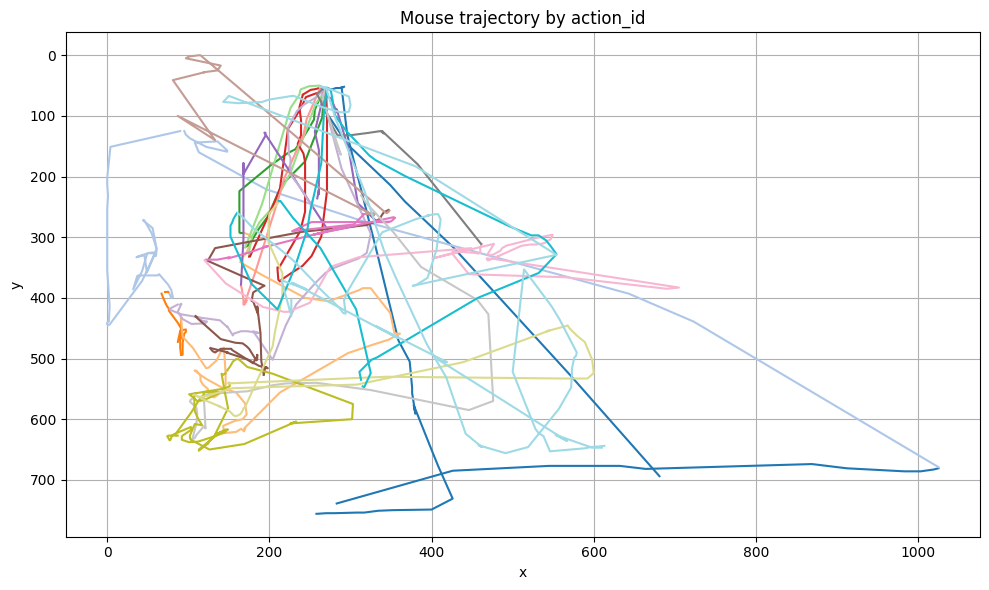

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Unique actions and color map
unique_actions = session_df['action_id'].unique()
colors = cm.get_cmap('tab20', len(unique_actions))

# Plot each action
fig, ax = plt.subplots(figsize=(12, 5))
plt.figure(figsize=(10, 6))
for i, aid in enumerate(unique_actions):
    seg = session_df[session_df['action_id'] == aid]
    plt.plot(seg['x'], seg['y'], label=f'Action {aid}', color=colors(i))

plt.gca().invert_yaxis()  # optional for screen coordinate style
plt.title("Mouse trajectory by action_id")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.grid(True)
# Save the correct figure
fig.savefig("Pause Ratio Distribution per User.png", dpi=300, bbox_inches='tight')
plt.show()

## Delete Short Action(<4 events)

In [ ]:
def drop_short_actions(df, action_col='action_id', min_length=4):
    """
    Removes actions with fewer than `min_length` rows.

    Parameters:
        df (pd.DataFrame): Input DataFrame with an action_id column.
        action_col (str): Name of the column that holds action identifiers.
        min_length (int): Minimum number of rows required per action.

    Returns:
        pd.DataFrame: Cleaned DataFrame with short actions removed.
    """
    valid_ids = df[action_col].value_counts()
    valid_ids = valid_ids[valid_ids >= min_length].index
    return df[df[action_col].isin(valid_ids)].reset_index(drop=True)

In [ ]:
session_df = drop_short_actions(session_df)
session_df[0:50]

,record timestamp,client timestamp,button,state,x,y,user,session,action_label,action_id
0,0.000,0.000,NoButton,Move,681,694,user35,session_5394017914,MM,1
1,0.118,0.109,NoButton,Move,570,526,user35,session_5394017914,MM,1
2,0.216,0.218,NoButton,Move,427,317,user35,session_5394017914,MM,1
3,0.351,0.343,NoButton,Move,367,241,user35,session_5394017914,MM,1
4,0.545,0.437,NoButton,Move,349,214,user35,session_5394017914,MM,1
5,0.545,0.546,NoButton,Move,297,148,user35,session_5394017914,MM,1
6,0.659,0.655,NoButton,Move,270,94,user35,session_5394017914,MM,1
7,0.920,0.655,NoButton,Move,267,76,user35,session_5394017914,MM,1
8,0.921,0.920,NoButton,Move,264,56,user35,session_5394017914,MM,1
9,1.049,1.045,NoButton,Move,278,56,user35,session_5394017914,MM,1


# Run and Save Train Data

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Code-and-Files/train_df_no_scroll.csv')

## Apply function

In [ ]:
from tqdm import tqdm

processed_sessions = []

for session_id, session_df in tqdm(train_df.groupby('session'), desc="Processing sessions"):
    session_df = session_df.sort_values('client timestamp').reset_index(drop=True)

    # Step 1: Label DD and MM
    session_df = label_dd_then_mm(session_df)

    # Step 2: Extend and label PC
    session_df = pc_labels(session_df)

    # Step 3: Remove scroll events
    session_df = remove_scroll_rows(session_df)

    # Step 4: Assign action_id per rules
    session_df = assign_action_ids(session_df)

    # Step 5: Drop short actions (<4 rows)
    session_df = drop_short_actions(session_df)

    processed_sessions.append(session_df)

# Final combined result
train_df_processed = pd.concat(processed_sessions, ignore_index=True)

Processing sessions: 100%|██████████| 65/65 [29:45<00:00, 27.47s/it]


## Save Train Dataset

In [ ]:
train_df_processed.to_csv('/content/drive/MyDrive/Thesis/Code-and-Files/train_df_processed.csv', index=False)

# Run and Save Test Data

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Code-and-Files/test_df_no_scroll.csv')

## Apply Function

In [ ]:
from tqdm import tqdm

processed_sessions = []

for session_id, session_df in tqdm(test_df.groupby('session'), desc="Processing sessions"):
    session_df = session_df.sort_values('client timestamp').reset_index(drop=True)

    # Step 1: Label DD and MM
    session_df = label_dd_then_mm(session_df)

    # Step 2: Extend and label PC
    session_df = pc_labels(session_df)

    # Step 3: Remove scroll events
    session_df = remove_scroll_rows(session_df)

    # Step 4: Assign action_id per rules
    session_df = assign_action_ids(session_df)

    # Step 5: Drop short actions (<4 rows)
    session_df = drop_short_actions(session_df)

    processed_sessions.append(session_df)

# Final combined result
test_df_processed = pd.concat(processed_sessions, ignore_index=True)

Processing sessions: 100%|██████████| 816/816 [08:53<00:00,  1.53it/s]


## Save Test Dataset

In [ ]:
test_df_processed.to_csv('/content/drive/MyDrive/Thesis/Code-and-Files/test_df_processed.csv', index=False)